In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

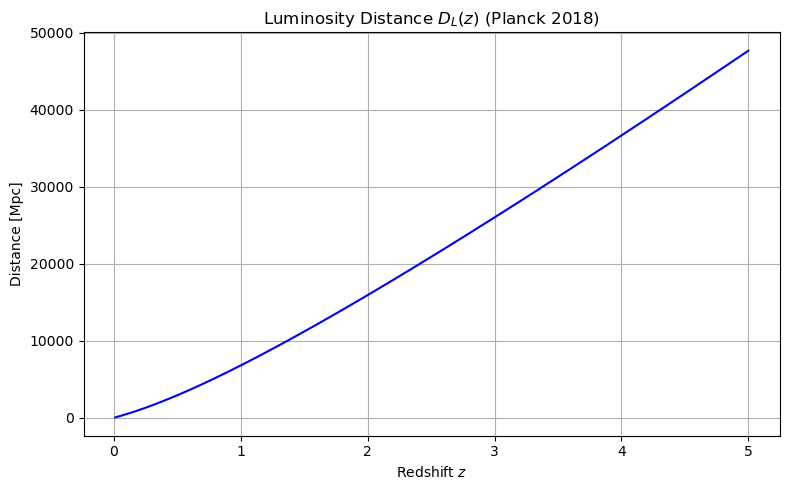

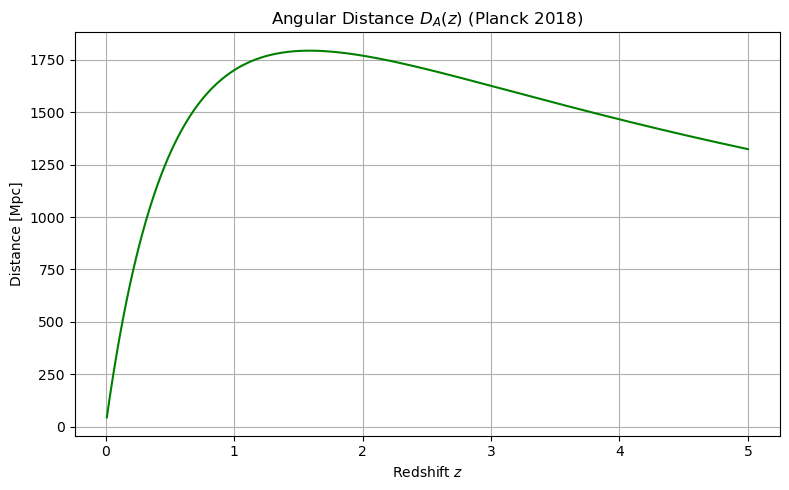

In [2]:
# ------------------------------
# Constants and Parameters
# ------------------------------
H0 = 67.4
h = H0 / 100
c = 299792.458

# Planck 2018 parameters
Omega_m = 0.315
Omega_lambda = 0.6847
#Omega_gamma = 2.47e-5 / h**2

# Hubble parameter as a function of redshift
def H(z):
    return H0 * np.sqrt(Omega_m * (1 + z)**3 + Omega_lambda)

# Comoving distance function
def comoving_distance(z):
    f = lambda z_prime: c / H(z_prime)
    integral, _ = quad(f, 0, z)
    return integral

z_vals = np.linspace(0.01, 5, 200)

# Calculate distances ----
D_C_vals = np.array([comoving_distance(z) for z in z_vals])
D_L_vals = (1 + z_vals) * D_C_vals
D_A_vals = D_C_vals / (1 + z_vals)


# Plot Luminosity Distance ----
plt.figure(figsize=(8, 5))
plt.plot(z_vals, D_L_vals, color='blue')
plt.title("Luminosity Distance $D_L(z)$ (Planck 2018)")
plt.xlabel("Redshift $z$")
plt.ylabel("Distance [Mpc]")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Angular Diameter Distance ----
plt.figure(figsize=(8, 5))
plt.plot(z_vals, D_A_vals, color='green')
plt.title("Angular Distance $D_A(z)$ (Planck 2018)")
plt.xlabel("Redshift $z$")
plt.ylabel("Distance [Mpc]")
plt.grid(True)
#plt.ylim(0, 2000)
plt.tight_layout()
plt.show()